<a href="https://colab.research.google.com/github/JudsonMorgan/Loan_prediction_ANN/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [2]:
#load the dataset
train_data = pd.read_csv("/content/drive/MyDrive/Exercise/data/train (1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Exercise/data/test.csv")

train_data.shape, test_data.shape

((614, 13), (367, 12))

In [3]:
#view the train data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#view the test data
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### EXPLORATORY DATA ANALYSIS (EDA)

- Data cleaning and prprocessing (Feature analysis, feature visualization, feature cleaning, and feature selection).

In [5]:
#check the shape of the data
train_data.shape

(614, 13)

In [6]:
#copy the train data
data = train_data.copy()
#make the Id column the index of the dataframe as we would be using it for building the model.
data.set_index('Loan_ID', inplace = True)
#view the data
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


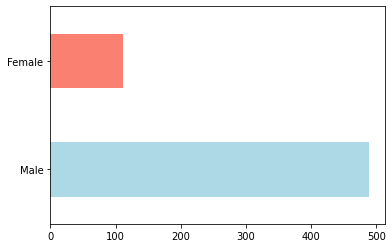

In [8]:
#the gender distribution
data['Gender'].value_counts().plot(kind='barh', color = ['lightblue', 'salmon'])
plt.show()

In [9]:
#group the gender and self employed columns
data.groupby('Gender')['Self_Employed'].value_counts()

Gender  Self_Employed
Female  No                89
        Yes               15
Male    No               402
        Yes               63
Name: Self_Employed, dtype: int64

Conclusion: Most of the applicants are not self employed. 

In [10]:
#group the gender and applicant income columns
data.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

Conclusion: On average, the male has higher income compare to the female.

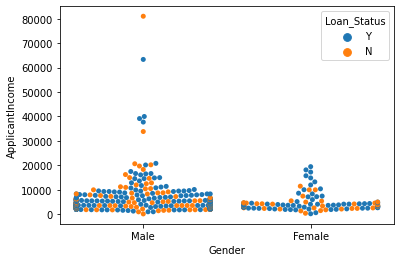

In [11]:
#check the distribution of the gender income
sns.swarmplot(data = data, x ='Gender', y = 'ApplicantIncome', hue = 'Loan_Status')

In [12]:
#group the education and applicantincome column
data.groupby('Education')['ApplicantIncome'].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

Conclusion: Most graduate has higher income compare to non-graduate.

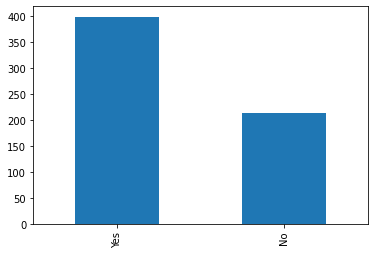

In [13]:
#the marital status distribution or count
data['Married'].value_counts().plot(kind = 'bar')

In [14]:
#group the married and coapplicantincome features
data.groupby('Married')['CoapplicantIncome'].mean()

Married
No     1316.558685
Yes    1794.632965
Name: CoapplicantIncome, dtype: float64

### Check for missing values

In [15]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

FIll in the missing numerical columns

In [16]:
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isna(content).sum():
      print(label)
    # print(label)

LoanAmount
Loan_Amount_Term
Credit_History


In [17]:
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isna(content).sum():
      data[label] = data[label].fillna(data[label].median())

In [18]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now, let's fill the missing categorical columns

In [19]:
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    if pd.isna(content).sum():
      print(label)

Gender
Married
Dependents
Self_Employed


In [20]:
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    if pd.isna(content).sum():
      data[label] = data[label].fillna(method = 'bfill')

In [21]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, we have no missing columns

### Outlier Detection and removal

- We are going to use boxplot to detect outliers for each numerical features and the interquartile range of each features to remove outliers.

In [22]:
#check the statistical information about numerical features
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


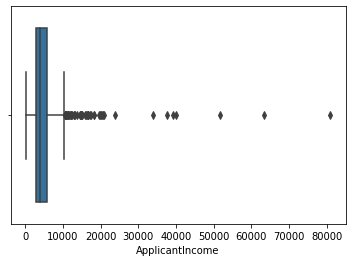

In [23]:
sns.boxplot(data = data, x = 'ApplicantIncome')

In [24]:
#calculating the value for Q1 and Q3. Q1 is 25 percentile, Q3 is 75 percentile.
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
Q1, Q3

(2877.5, 5795.0)

In [25]:
IQR = Q3 - Q1
IQR

2917.5

In [26]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit, upper_limit

(-1498.75, 10171.25)

In [27]:
data[(data['ApplicantIncome']>upper_limit) | (data['ApplicantIncome'] < lower_limit)].shape

(50, 12)

In [28]:
data_2 = data[(data['ApplicantIncome'] <= upper_limit) & (data['ApplicantIncome'] >= lower_limit)]

In [29]:
data_2.shape

(564, 12)

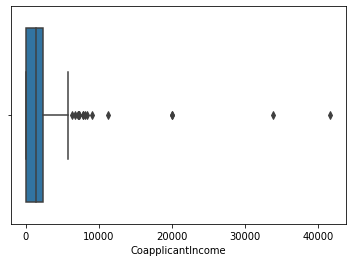

In [30]:
sns.boxplot(data = data_2, x = "CoapplicantIncome")

In [31]:
Q1 = data_2['CoapplicantIncome'].quantile(0.25)
Q3 = data_2['CoapplicantIncome'].quantile(0.75)
Q1, Q3

(0.0, 2337.0)

In [32]:
IQR = Q3 - Q1
IQR

2337.0

In [33]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-3505.5, 5842.5)

In [34]:
data_2[(data_2['CoapplicantIncome'] > upper_limit) | (data_2['CoapplicantIncome'] < lower_limit)].shape

(16, 12)

In [35]:
data_3 = data_2[(data_2['CoapplicantIncome'] <= upper_limit) & (data_2['CoapplicantIncome'] >= lower_limit)]
data_3.shape[0]

548

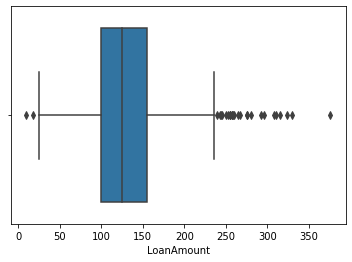

In [36]:
sns.boxplot(data = data_3, x = 'LoanAmount')

In [37]:
Q1 = data_3['LoanAmount'].quantile(0.25)
Q3 = data_3['LoanAmount'].quantile(0.75)
Q3, Q1

(155.0, 100.0)

In [38]:
IQR = Q3 - Q1
IQR

55.0

In [39]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(17.5, 237.5)

In [40]:
data_3[(data_3['LoanAmount'] > upper_limit) | (data_3['LoanAmount'] < lower_limit)].shape

(28, 12)

In [41]:
data_4 = data_3[(data_3['LoanAmount'] <= upper_limit) & (data_3['LoanAmount'] >= lower_limit)]
data_4.shape

(520, 12)

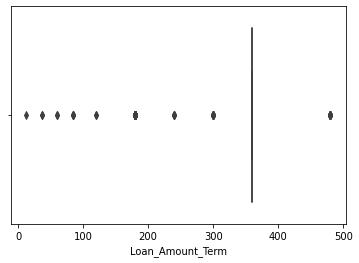

In [42]:
sns.boxplot(data = data_4, x = "Loan_Amount_Term")

In [43]:
Q1 = data_4['Loan_Amount_Term'].quantile(0.25)
Q3 = data_4['Loan_Amount_Term'].quantile(0.75)
Q1, Q3

(360.0, 360.0)

In [44]:
IQR = Q3 - Q1
IQR

0.0

In [45]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(360.0, 360.0)

In [46]:
data_4[(data_4['Loan_Amount_Term'] > upper_limit) | (data_4['Loan_Amount_Term'] < lower_limit)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,1.0,Urban,Y
LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
LP001248,Male,No,0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y


In [47]:
data_5 = data_4[(data_4['Loan_Amount_Term'] <= upper_limit) & (data_4['Loan_Amount_Term'] >= lower_limit)]
data_5.shape

(445, 12)

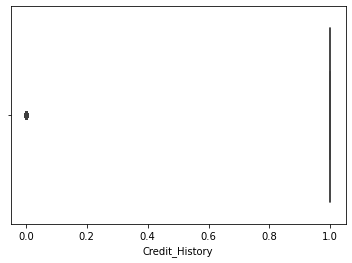

In [48]:
sns.boxplot(data = data_5, x = "Credit_History")

In [49]:
Q1 = data_5['Credit_History'].quantile(0.25)
Q3 = data_5['Credit_History'].quantile(0.75)
Q3, Q1

(1.0, 1.0)

In [50]:
IQR = Q3 - Q1
IQR

0.0

In [51]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(1.0, 1.0)

In [52]:
data_5[(data_5['Credit_History'] > upper_limit) | (data_5['Credit_History'] < lower_limit)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
LP001050,Male,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002872,Male,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N


In [53]:
data_6 = data_5[(data_5['Credit_History'] <= upper_limit) & (data_5['Credit_History'] >= lower_limit)]
data_6.shape

(383, 12)

In [54]:
cleaned_data = data_6.copy()

### Feature Selection.

- We would select features using the Pearson's Rank correlation coefficient.

In [55]:
cleaned_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
corr = cleaned_data.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.283601,0.466934,NaN,NaN
CoapplicantIncome,-0.283601,1.000000,0.279317,NaN,NaN
LoanAmount,0.466934,0.279317,1.000000,NaN,NaN
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN


### Plot the heatmap

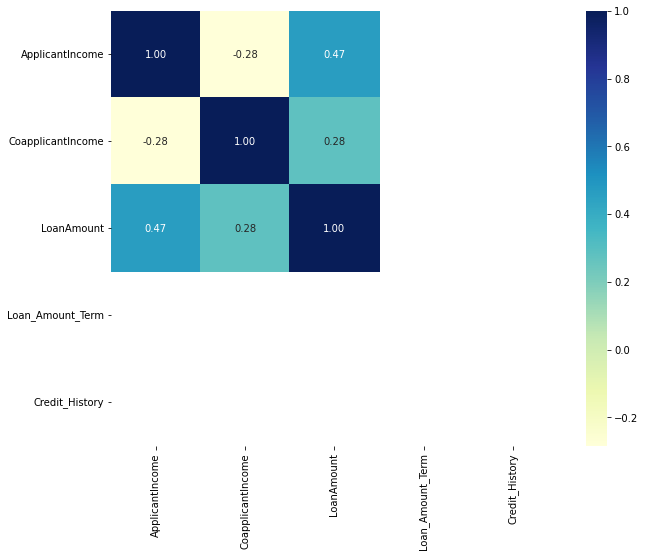

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            annot=True,
            fmt='.2f',
            cmap = 'YlGnBu')
plt.show()

### Feature Encoding

In [58]:
for label, content in cleaned_data.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [59]:
Le = LabelEncoder()
cleaned_data['Gender'] = Le.fit_transform(cleaned_data['Gender'])
cleaned_data['Married'] = Le.fit_transform(cleaned_data['Married'])
cleaned_data['Dependents'] = Le.fit_transform(cleaned_data['Dependents'])
cleaned_data['Education'] = Le.fit_transform(cleaned_data['Education'])
cleaned_data['Self_Employed'] = Le.fit_transform(cleaned_data['Self_Employed'])
cleaned_data['Property_Area'] = Le.fit_transform(cleaned_data['Property_Area'])

cleaned_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


#### Target Encoding

In [60]:
cleaned_data['Loan_Status'].value_counts()

Y    313
N     70
Name: Loan_Status, dtype: int64

In [61]:
cleaned_data['Loan_Status'] = cleaned_data['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)

cleaned_data['Loan_Status'].value_counts()

1    313
0     70
Name: Loan_Status, dtype: int64

In [62]:
df = cleaned_data.copy()

### Balance the target column

In [63]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [65]:
X = df.iloc[:, : - 1]
y = df.iloc[:, -1]
X.shape, y.shape

((383, 11), (383,))

In [66]:
counter = Counter(y)
print(counter)

Counter({1: 313, 0: 70})


In [67]:
sm = SMOTE()
X, y = sm.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({1: 313, 0: 313})


### Feature Scaling

- We would omit the categorical columns for scaling.

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomerScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy=copy, with_mean = with_mean, with_std = with_std)
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std
        
    def fit(self, X, y=None):
        self.scaler = StandardScaler(copy=self.copy, with_mean = self.with_mean, with_std = self.with_std)
        self.scaler.fit(X[self.columns], y)
        self.with_mean = np.mean(X[self.columns])
        self.with_var = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_not_scaled = X.iloc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [69]:
X.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype=object)

In [70]:
columns_to_omit = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
#using list comprehension to omit some columns
columns_to_scale = [i for i in X.columns.values if i not in columns_to_omit]
columns_to_scale

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [71]:
scaler = CustomerScaler(columns_to_scale)
scaler

CustomerScaler(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                        'Loan_Amount_Term', 'Credit_History'])

In [72]:
scaler.fit(X)

CustomerScaler(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                        'Loan_Amount_Term', 'Credit_History'],
               with_mean=ApplicantIncome      4057.592652
CoapplicantIncome    1200.886944
LoanAmount            125.150835
Loan_Amount_Term      360.000000
Credit_History          1.000000
dtype: float64)

In [73]:
X_scaled = scaler.transform(X)
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.963222,-0.880738,0.072170,0.0,0.0,2
1,1,1,1,0,0,0.282506,0.225239,0.072170,0.0,0.0,0
2,1,1,0,0,1,-0.568657,-0.880738,-1.498297,0.0,0.0,2
3,1,1,0,1,0,-0.792874,0.848634,-0.130471,0.0,0.0,2
4,1,0,0,0,0,1.044414,-0.880738,0.401461,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
621,1,0,1,0,0,-0.621351,0.283681,0.466445,0.0,0.0,1
622,1,0,0,0,0,2.149905,-0.880738,0.602052,0.0,0.0,0
623,1,1,0,0,0,-0.827824,0.421884,0.950041,0.0,0.0,0
624,0,0,0,0,0,2.092372,-0.880738,1.844614,0.0,0.0,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((500, 11), (126, 11), (500,), (126,))

### Modelling and Experimentation

In [75]:
#creating a dictionary to store the entire models
models = {"DTC" : DecisionTreeClassifier(),
         "SVM" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
          "Naive_Bayes": GaussianNB(),
          "MLP" : MLPClassifier()}

#random seed
np.random.seed(42)
# create a function
def fit_and_score(models,X_train, X_test, y_train, y_test):
    """
    to fit and score our machine learning models on our data.

    """
    # an empty dictionary to return the model scores
    model_score = {}
    #looping through the models in the dictionary
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [76]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)
model_score

{'DTC': 0.7063492063492064,
 'SVM': 0.6190476190476191,
 'KNN': 0.7301587301587301,
 'Naive_Bayes': 0.6111111111111112,
 'MLP': 0.6825396825396826}

In [77]:
compare_model = pd.DataFrame(model_score, index = ["Accuracy_score"])
compare_model

,DTC,SVM,KNN,Naive_Bayes,MLP
Accuracy_score,0.706349,0.619048,0.730159,0.611111,0.68254


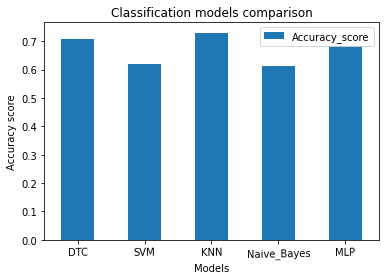

In [78]:
#visual view of the accuracy scores
compare_model.T.plot.bar();

#customize plots
plt.title("Classification models comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.xticks(rotation=1);

### Hyperparameter tuning

In [79]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
dt.score(X_test, y_test)

0.7222222222222222

In [81]:
y_pred = dt.predict(X_test)
y_pred[:10]

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [82]:
from sklearn.model_selection import GridSearchCV
grid = {"max_depth" : np.linspace(1, 32, 32),
        "min_samples_split" : np.linspace(0.1, 1.0, 10),
        "min_samples_leaf" : np.linspace(0.1, 0.5, 5)}

dt_grid = GridSearchCV(dt,
                       grid,
                       cv = 5,
                       verbose =True,
                       return_train_score=True,
                       n_jobs = -1)

dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, verbose=True)

In [83]:
dt.score(X_test, y_test)

0.7222222222222222

In [84]:
dt.score(X_train, y_train)

1.0

The Decision tree model is underfitting as it performs poorly on unseen data and performs better on the training data.

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7301587301587301

In [86]:
knn.score(X_train, y_train)

0.814

In [87]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.6111111111111112

In [88]:
nb.score(X_train, y_train)

0.656

In [89]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.7063492063492064

In [90]:
mlp.score(X_train, y_train)

0.764

Conclusion: We can conclude that the best model is the KNN model.